In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Mall_Customers.csv')
data.head()

print(data.shape)

(200, 5)


In [2]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data=data.drop(columns='CustomerID')
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [4]:
group_gender = data.groupby(['Gender'])['Spending Score (1-100)'].mean().reset_index().sort_values(by='Spending Score (1-100)')
group_gender

,Gender,Spending Score (1-100)
1,Male,48.511364
0,Female,51.526786


<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

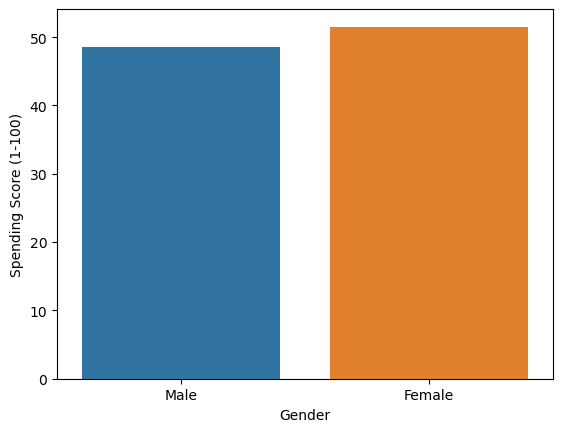

In [5]:
sns.barplot(group_gender, x="Gender", y="Spending Score (1-100)")

In [6]:
age=sorted(data.Age.unique())
age

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70]

In [7]:
age_30=[x for x in data.Age if x <= 30]
age_40=[x for x in data.Age if x <= 30]
age_50=[x for x in data.Age if x <= 30]
age_60=[x for x in data.Age if x <= 30]
age_70=[x for x in data.Age if x <= 30]

In [8]:
# Define age ranges
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '30-40', '40-50', '50-60', '60+']

# Create a new column with age ranges
data['Age Range'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Split the dataset based on age ranges
age_groups = data.groupby('Age Range')


In [9]:
age_groups.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Range
0,Male,19,15,39,18-30
1,Male,21,15,81,18-30
2,Female,20,16,6,18-30
3,Female,23,16,77,18-30
4,Female,31,17,40,30-40
5,Female,22,17,76,18-30
6,Female,35,18,6,30-40
8,Male,64,19,3,60+
9,Female,30,19,72,30-40
10,Male,67,19,14,60+


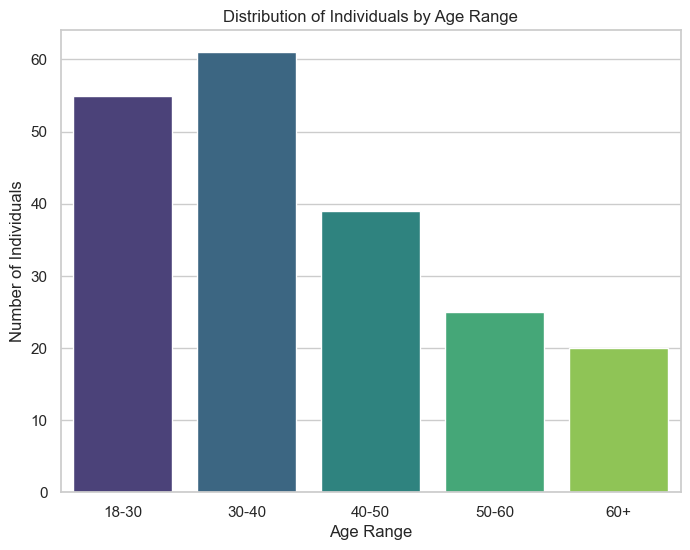

In [10]:
# Set Seaborn style
sns.set(style="whitegrid")

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='Age Range', data=data, palette='viridis')
plt.xlabel('Age Range')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Individuals by Age Range')
plt.show()


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income (k$)'}>],
       [<Axes: title={'center': 'Spending Score (1-100)'}>, <Axes: >]],
      dtype=object)

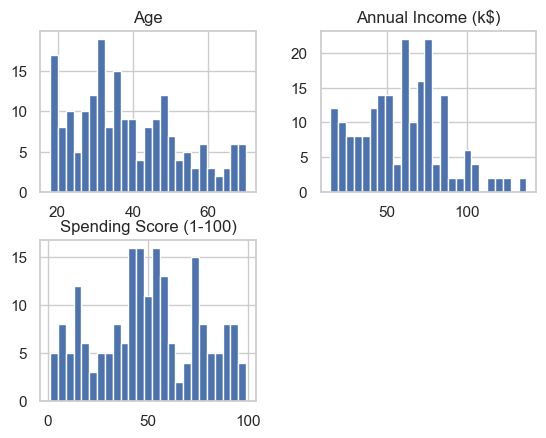

In [11]:
data.hist(bins=25)

In [12]:
data = pd.get_dummies(data, columns = ['Gender'],dtype=int) 
data

,Age,Annual Income (k$),Spending Score (1-100),Age Range,Gender_Female,Gender_Male
0,19,15,39,18-30,0,1
1,21,15,81,18-30,0,1
2,20,16,6,18-30,1,0
3,23,16,77,18-30,1,0
4,31,17,40,30-40,1,0
...,...,...,...,...,...,...
195,35,120,79,30-40,1,0
196,45,126,28,40-50,1,0
197,32,126,74,30-40,0,1
198,32,137,18,30-40,0,1


In [21]:
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [23]:
from sklearn.metrics import silhouette_score


for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(features_scaled)
    silhouette_avg = silhouette_score(features_scaled, cluster_labels)
    print(f"For n_clusters = {i}, the average silhouette_score is : {silhouette_avg}")


For n_clusters = 2, the average silhouette_score is : 0.33547192894004574
For n_clusters = 3, the average silhouette_score is : 0.357793388710272
For n_clusters = 4, the average silhouette_score is : 0.4039582785148566
For n_clusters = 5, the average silhouette_score is : 0.41664341513732767
For n_clusters = 6, the average silhouette_score is : 0.4284167762892593
For n_clusters = 7, the average silhouette_score is : 0.417231894954916
For n_clusters = 8, the average silhouette_score is : 0.4082067042807375
For n_clusters = 9, the average silhouette_score is : 0.41769250624076476
For n_clusters = 10, the average silhouette_score is : 0.40655411010117015
For n_clusters = 11, the average silhouette_score is : 0.40861878459370105
For n_clusters = 12, the average silhouette_score is : 0.39284582303293175
For n_clusters = 13, the average silhouette_score is : 0.3856266309743293
For n_clusters = 14, the average silhouette_score is : 0.3866476836840209
For n_clusters = 15, the average silhouett

In [27]:
kmeans = KMeans(n_clusters=6, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [28]:
data

,Age,Annual Income (k$),Spending Score (1-100),Age Range,Gender_Female,Gender_Male,Cluster
0,19,15,39,18-30,0,1,4
1,21,15,81,18-30,0,1,4
2,20,16,6,18-30,1,0,5
3,23,16,77,18-30,1,0,4
4,31,17,40,30-40,1,0,5
...,...,...,...,...,...,...,...
195,35,120,79,30-40,1,0,3
196,45,126,28,40-50,1,0,2
197,32,126,74,30-40,0,1,3
198,32,137,18,30-40,0,1,2


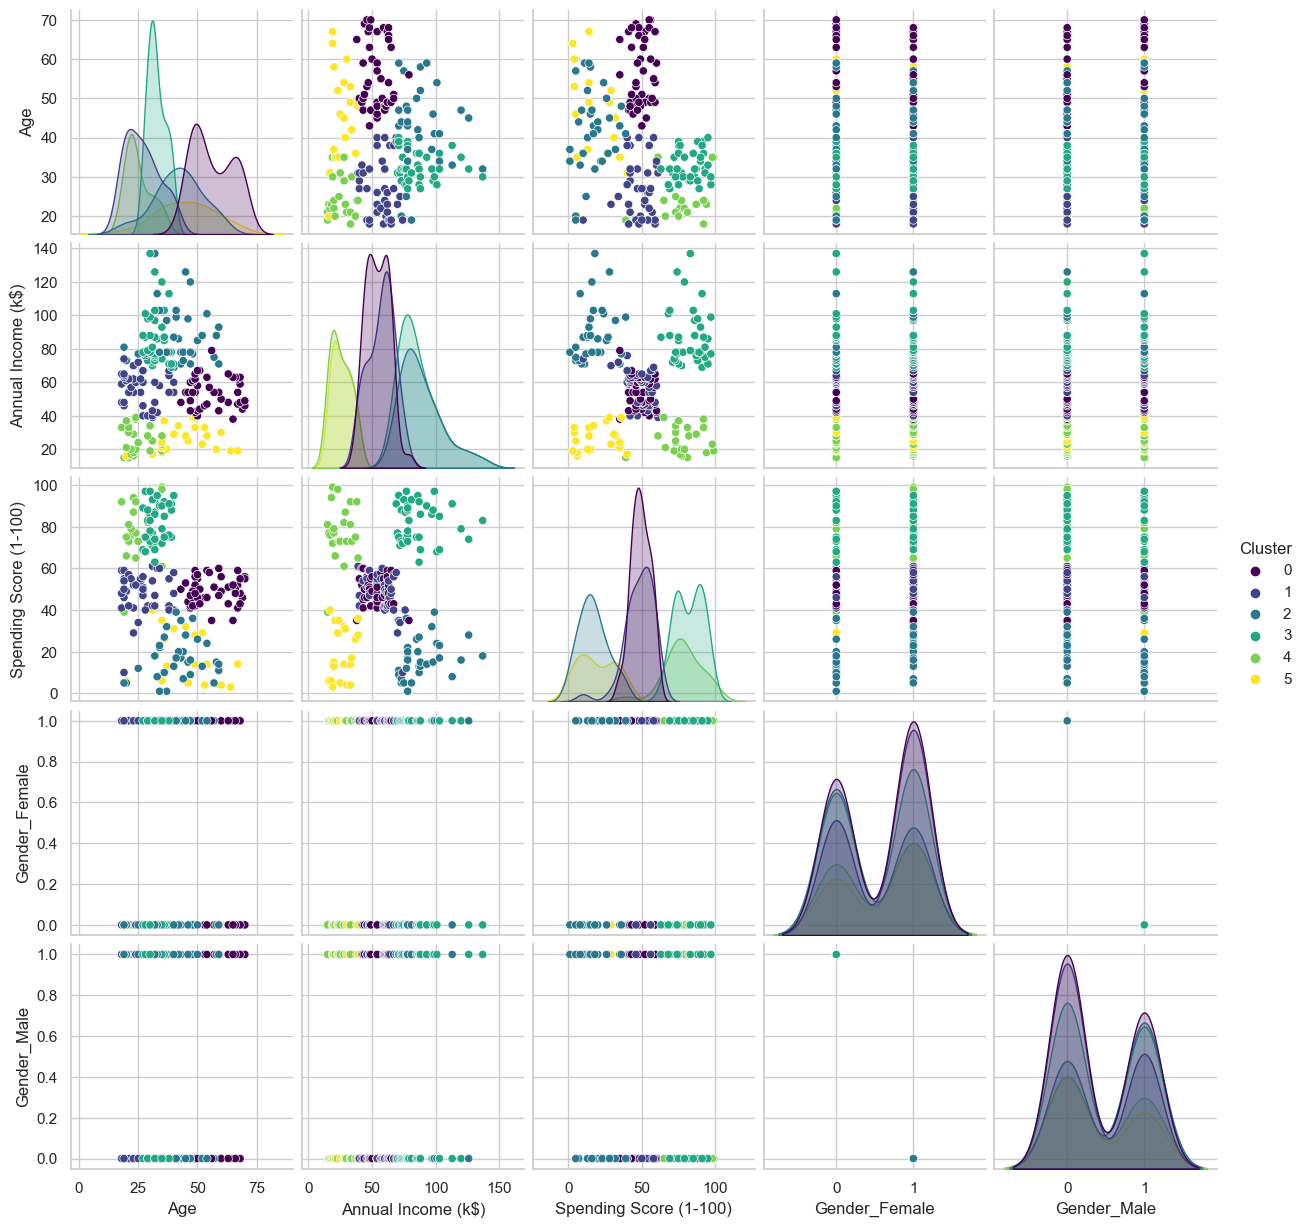

In [29]:
sns.pairplot(data, hue='Cluster', palette='viridis', diag_kind='kde')
plt.show()